## Auto Encoders

In [113]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.model_selection import train_test_split

In [114]:
# Loading the dataset
iris = datasets.load_iris()

X = iris.data
y = iris.target
print("X:",X[0])
target_names = iris.target_names


# Scaling the data
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

X: [5.1 3.5 1.4 0.2]


In [121]:
# Function for plotting the graphs

def plot3clusters(X, title, vtitle):
    plt.figure()
    colors = ['navy','turquoise','darkorange']
    for color, i, target_name in zip(colors, [0,1,2], target_names):
        plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target_name)
    plt.legend(loc='upper left')
    plt.title(title)
    plt.xlabel(vtitle + "1")
    plt.ylabel(vtitle + "2")
    plt.show()

ye cell banana hai

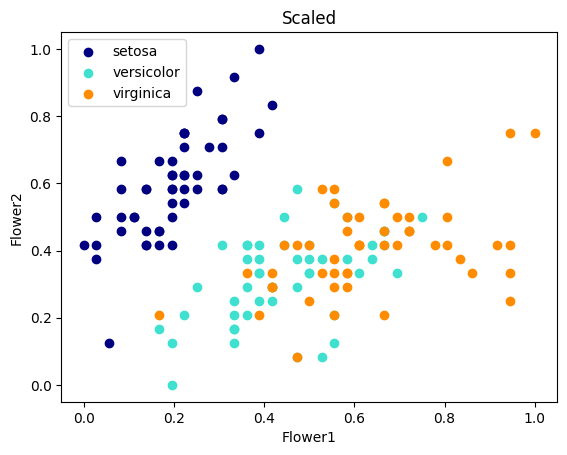

In [122]:
plot3clusters(X_scaled,'Scaled','Flower')

and ye wala

In [117]:
input_dims=X_scaled.shape[1]
input_layer=Input(shape=(input_dims,))

encoded=Dense(10,activation='relu')(input_layer)
encoded1=Dense(3,activation='relu')(encoded)

decoded=Dense(3,activation='relu')(encoded1)
decoded1=Dense(input_dims,activation='sigmoid')(decoded)

autoencoder=Model(input_layer,decoded1)

autoencoder.compile(optimizer='adam',loss='mse')
autoencoder.summary()

history=autoencoder.fit(X_scaled,X_scaled,epochs=500,batch_size=32,validation_split=0.2,verbose=0)


Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_19 (InputLayer)     │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 3)              │            33 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 3)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 4)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111 (444.00 B)

 Trainable params: 111 (444.00 B)

 Non-trainable params: 0 (0.00 B)

In [118]:
encoder=Model(inputs=autoencoder.input,outputs=encoded1)
encoded_training_data = encoder.predict(X_scaled)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


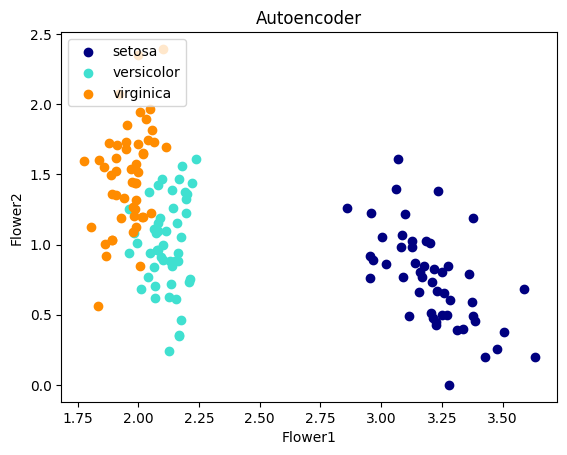

In [123]:
plot3clusters(encoded_training_data,'Autoencoder','Flower')

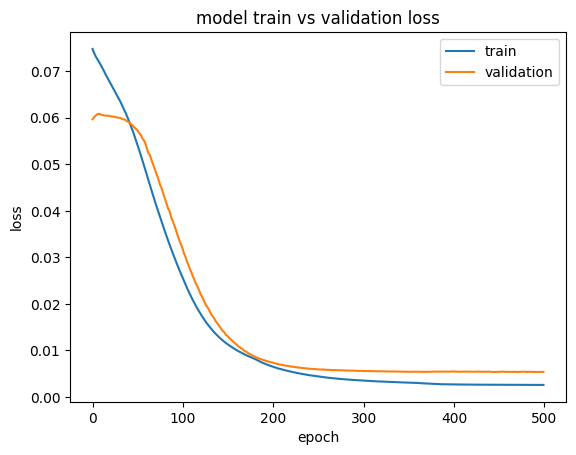

In [120]:
# "encoded" representation of the input
# encoded = None

# # "decoded" lossy reconstruction of the input
# decoded = None

# # Map an input to reconstruction
# autoencoder = None

# history = None


# Plot the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper right')
plt.show()


# Use the encoded layer to encode the training input
